In [14]:
# DSP 461: Final Project Exploratory Data Analysis 
# Carly Carroll & Ryan Tsang 

In [15]:
##### LOAD LIBRARIES #####

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
##### LOAD AFFORDABILITY DATA INTO PYTHON #####

affordability = pd.read_csv("affordability.csv")

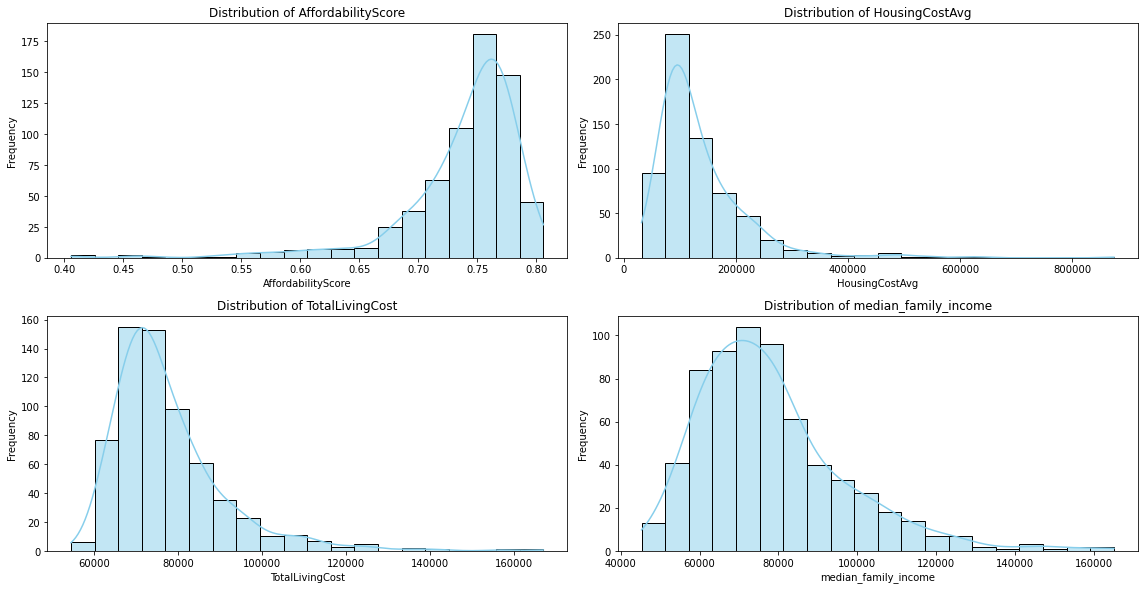

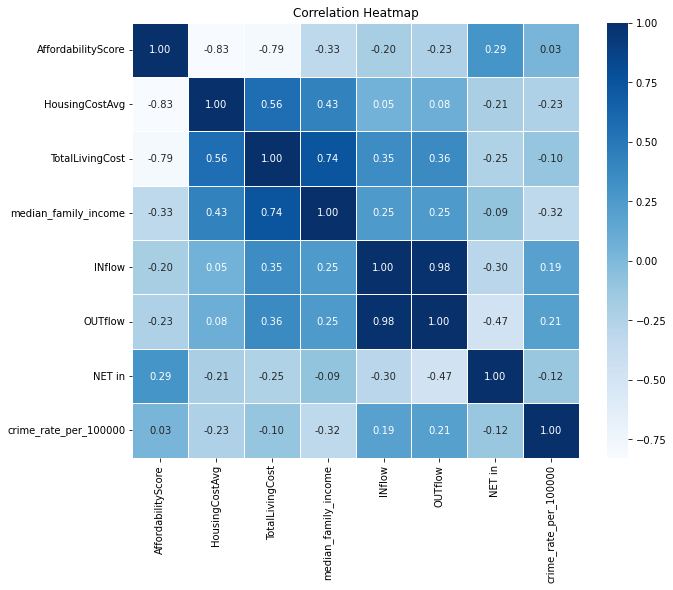

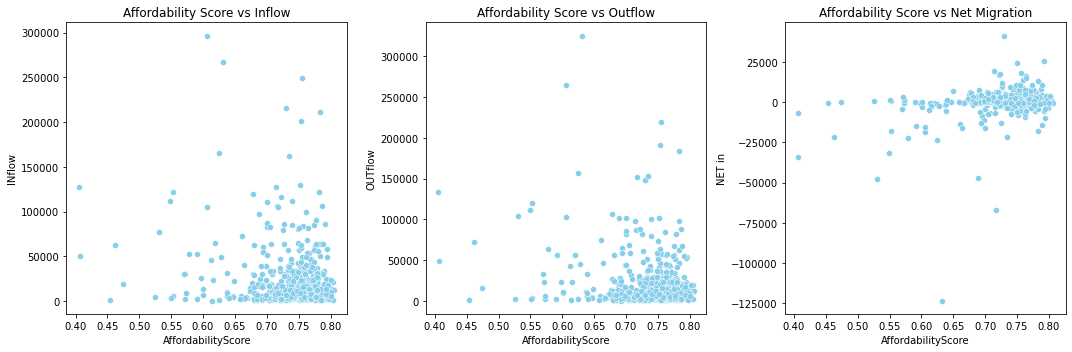

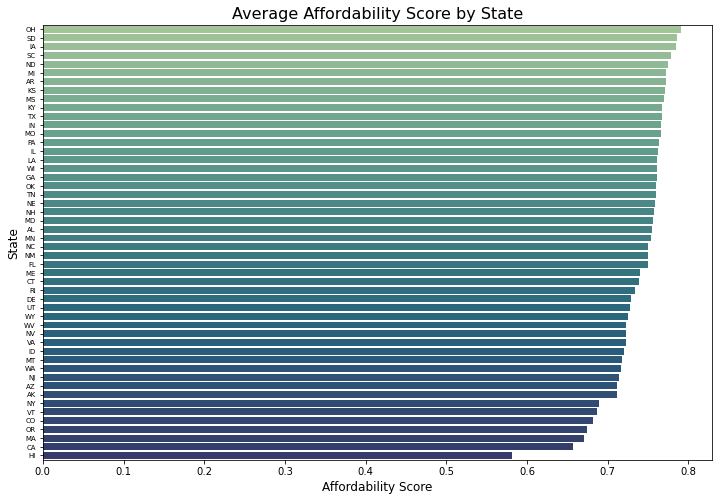

Top 10 Most Affordable Counties:
             RegionName StateName  AffordabilityScore
2138      Medina County        OH            0.806156
1938        Linn County        IA            0.804568
1986  Los Alamos County        NM            0.804386
224       Barton County        KS            0.803034
1976      Lorain County        OH            0.802483
3738        Wood County        OH            0.801509
3711    Williams County        ND            0.800294
20         Aiken County        SC            0.800075
2648  Pennington County        MN            0.799958
3444    Trumbull County        OH            0.798211

Top 10 Least Affordable Counties:
                RegionName StateName  AffordabilityScore
2409       New York County        NY            0.405689
3049      San Mateo County        CA            0.407055
2711         Pitkin County        CO            0.454124
3018  San Francisco County        CA            0.462243
2087          Marin County        CA            0.474

In [18]:
##### EXPLORATORY DATA ANALYSIS (EDA) #####

# Objective: Understand the distribution and relationship between key variables 
# Key Questions: 
    # Is there a significant difference in affordability across different states/counties 
    # Is there a correlation between high affordability scores and net migration patterns (NET in)
    # What counties are in the lowest and highest percentiles of affordability 
    
# removing duplicates from the dataset for unique RegionName and StateName
affordability = affordability.drop_duplicates(subset=['RegionName', 'StateName'])

### visualize the distribution of key variables ###

# plot frequency histograms to visualize key variables
key_variables = ['AffordabilityScore', 'HousingCostAvg', 'TotalLivingCost', 'median_family_income']
plt.figure(figsize=(16, 16))
for i, var in enumerate(key_variables, 1):
    plt.subplot(4, 2, i)
    sns.histplot(affordability[var], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### correlation heat map ###

# select columns for heat map 
correlation_vars = ['AffordabilityScore', 'HousingCostAvg', 'TotalLivingCost', 
                    'median_family_income', 'INflow', 'OUTflow', 'NET in', 'crime_rate_per_100000']

# compute the correlation matrix
correlation_matrix = affordability[correlation_vars].corr()

# plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### scatterplot to determine relationships ###

# scatterplots for affordability score vs migration patterns
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(data=affordability, x='AffordabilityScore', y='INflow', color='skyblue')
plt.title('Affordability Score vs Inflow')

plt.subplot(1, 3, 2)
sns.scatterplot(data=affordability, x='AffordabilityScore', y='OUTflow', color='skyblue')
plt.title('Affordability Score vs Outflow')

plt.subplot(1, 3, 3)
sns.scatterplot(data=affordability, x='AffordabilityScore', y='NET in', color='skyblue')
plt.title('Affordability Score vs Net Migration')

plt.tight_layout()
plt.show()

### state level comparisons ###

# group by StateName and calculate the mean AffordabilityScore
state_scores = affordability.groupby('StateName')['AffordabilityScore'].mean().reset_index()

# sort values and plot 
state_scores = state_scores.sort_values('AffordabilityScore', ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(data=state_scores, x='AffordabilityScore', y='StateName', palette='crest')
plt.title('Average Affordability Score by State', fontsize=16)
plt.xlabel('Affordability Score', fontsize=12)
plt.ylabel('State', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=7) 
plt.show()

### identification of counties with extreme scores ##

# top 10 most affordable counties
top_counties = affordability.nlargest(10, 'AffordabilityScore')[['RegionName', 'StateName', 'AffordabilityScore']]
print("Top 10 Most Affordable Counties:")
print(top_counties)

# bottom 10 least affordable counties
bottom_counties = affordability.nsmallest(10, 'AffordabilityScore')[['RegionName', 'StateName', 'AffordabilityScore']]
print("\nTop 10 Least Affordable Counties:")
print(bottom_counties)